In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt

In [2]:
#utiliza as funções do sklearn para construir a regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Carregando os dados
arquivo = 'anscombes.csv'
#colunas = ['Index','Idade', 'Salário']
dados = read_csv(arquivo, sep = ",")#, skiprows=1)#
dados = dados.drop(['id'], axis=1)
print(dados)
#idade = dados['Idade'].values
#salario = dados['Salário'].values

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [4]:
tipo1 = dados[dados['dataset']=='I']
tipo1 = tipo1.drop(['dataset'], axis=1).reset_index(drop=True)
tipo2 = dados[dados['dataset']=='II']
tipo2 = tipo2.drop(['dataset'], axis=1).reset_index(drop=True)
tipo3 = dados[dados['dataset']=='III']
tipo3 = tipo3.drop(['dataset'], axis=1).reset_index(drop=True)
tipo4 = dados[dados['dataset']=='IV']
tipo4 = tipo4.drop(['dataset'], axis=1).reset_index(drop=True)

In [55]:
def regressao(x, y):
    reg = LinearRegression() #objeto para a regressão linear
    x_ModeloSklern=x.reshape((-1, 1)) # na regressão linear é necessário que o X seja 2D
    regressao= reg.fit (x_ModeloSklern,y) # realiza a regressão

    previsao=reg.predict(x_ModeloSklern)

    MSE= mean_squared_error(y,previsao) # encontra o MSE através do sklearn
    #print('MSE: ', MSE)

    #parâmetros encontrados
    #print('Y = {}X {}'.format(reg.coef_,reg.intercept_))
    if reg.intercept_<0:
        equacao = ('Y = {:.4f}X {:.4f}'.format(reg.coef_[0],reg.intercept_))
    else:
        equacao = ('Y = {:.4f}X +{:.4f}'.format(reg.coef_[0],reg.intercept_))       


    from sklearn.metrics import r2_score #método para o cálculo do R2

    R_2 = r2_score(y, previsao)  #realiza o cálculo do R2

    #print("Coeficiente de Determinação (R2):", R_2)

    return previsao, MSE, R_2, equacao

In [56]:
regressaoI = regressao(tipo1['x'].values,tipo1['y'].values)
regressaoII = regressao(tipo2['x'].values,tipo2['y'].values)
regressaoIII = regressao(tipo3['x'].values,tipo3['y'].values)
regressaoIV = regressao(tipo4['x'].values,tipo4['y'].values)


In [57]:
#print(type(regressaoI))
regressaoI = list(regressaoI)
regressaoII = list(regressaoII)
regressaoIII = list(regressaoIII)
regressaoIV = list(regressaoIV)

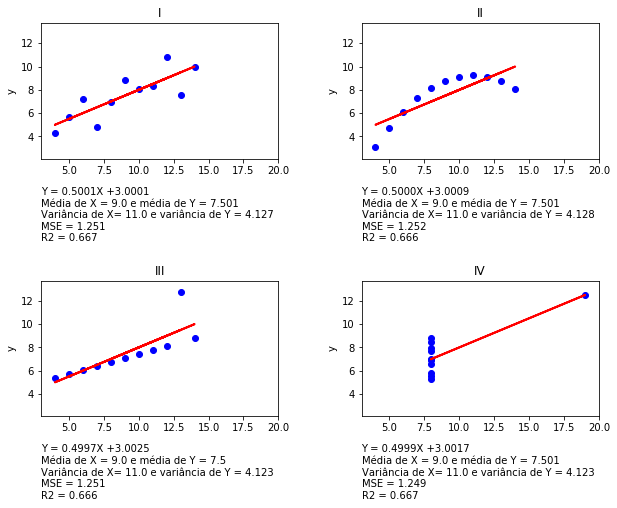

In [93]:
plt.figure(figsize=(10,7))

# Subplot Tipo 1
plt.subplot(2, 2, 1) 
plt.scatter(tipo1['x'], tipo1['y'], marker='o', color='blue')
plt.plot(tipo1['x'], regressaoI[0], color='red', linewidth=2) # realiza o plto da "linha"
plt.xlim(dados['x'].min()-1, dados['x'].max()+1)
plt.ylim(dados['y'].min()-1, dados['y'].max()+1)
plt.title("I")
#plt.xlabel(regressaoI[3])
plt.ylabel('y')

equacao = regressaoI[3]
plt.text(3, -1, equacao, ha='left', rotation=0)
media = 'Média de X = ' + str(tipo1['x'].mean()) + ' e média de Y = ' + str(round(tipo1['y'].mean(),3))
plt.text(3, -2, media, ha='left', rotation=0)
var = 'Variância de X= ' + str(tipo1['x'].var()) + ' e variância de Y = ' + str(round(tipo1['y'].var(),3))
plt.text(3, -3, var, ha='left', rotation=0)
MSE = 'MSE = ' + str(round(regressaoI[1],3))
plt.text(3, -4, MSE, ha='left', rotation=0)
R_2 = 'R2 = ' + str(round(regressaoI[2],3))
plt.text(3, -5, R_2, ha='left', rotation=0)


# Subplot Tipo 2
plt.subplot(2, 2, 2) 
plt.scatter(tipo2['x'], tipo2['y'], marker='o', color='blue')
plt.plot(tipo2['x'], regressaoII[0], color='red', linewidth=2) # realiza o plto da "linha"
plt.xlim(dados['x'].min()-1, dados['x'].max()+1)
plt.ylim(dados['y'].min()-1, dados['y'].max()+1)
plt.title("II")
#plt.xlabel(regressaoII[3])
plt.ylabel('y')

equacao = regressaoII[3]
plt.text(3, -1, equacao, ha='left', rotation=0)
media = 'Média de X = ' + str(tipo2['x'].mean()) + ' e média de Y = ' + str(round(tipo2['y'].mean(),3))
plt.text(3, -2, media, ha='left', rotation=0)
var = 'Variância de X= ' + str(tipo2['x'].var()) + ' e variância de Y = ' + str(round(tipo2['y'].var(),3))
plt.text(3, -3, var, ha='left', rotation=0)
MSE = 'MSE = ' + str(round(regressaoII[1],3))
plt.text(3, -4, MSE, ha='left', rotation=0)
R_2 = 'R2 = ' + str(round(regressaoII[2],3))
plt.text(3, -5, R_2, ha='left', rotation=0)


# Subplot Tipo 3
plt.subplot(2, 2, 3) 
plt.scatter(tipo3['x'], tipo3['y'], marker='o', color='blue')
plt.plot(tipo3['x'], regressaoIII[0], color='red', linewidth=2) # realiza o plto da "linha"
plt.xlim(dados['x'].min()-1, dados['x'].max()+1)
plt.ylim(dados['y'].min()-1, dados['y'].max()+1)
plt.title("III")
#plt.xlabel(regressaoIII[3])
plt.ylabel('y')

equacao = regressaoIII[3]
plt.text(3, -1, equacao, ha='left', rotation=0)
media = 'Média de X = ' + str(tipo3['x'].mean()) + ' e média de Y = ' + str(round(tipo3['y'].mean(),3))
plt.text(3, -2, media, ha='left', rotation=0)
var = 'Variância de X= ' + str(tipo3['x'].var()) + ' e variância de Y = ' + str(round(tipo3['y'].var(),3))
plt.text(3, -3, var, ha='left', rotation=0)
MSE = 'MSE = ' + str(round(regressaoIII[1],3))
plt.text(3, -4, MSE, ha='left', rotation=0)
R_2 = 'R2 = ' + str(round(regressaoIII[2],3))
plt.text(3, -5, R_2, ha='left', rotation=0)


# Subplot Tipo 4
plt.subplot(2, 2, 4) 
plt.scatter(tipo4['x'], tipo4['y'], marker='o', color='blue')
plt.plot(tipo4['x'], regressaoIV[0], color='red', linewidth=2) # realiza o plto da "linha"
plt.xlim(dados['x'].min()-1, dados['x'].max()+1)
plt.ylim(dados['y'].min()-1, dados['y'].max()+1)
plt.title("IV")
#plt.xlabel(regressaoIV[3])
plt.ylabel('y')

equacao = regressaoIV[3]
plt.text(3, -1, equacao, ha='left', rotation=0)
media = 'Média de X = ' + str(tipo4['x'].mean()) + ' e média de Y = ' + str(round(tipo4['y'].mean(),3))
plt.text(3, -2, media, ha='left', rotation=0)
var = 'Variância de X= ' + str(tipo4['x'].var()) + ' e variância de Y = ' + str(round(tipo4['y'].var(),3))
plt.text(3, -3, var, ha='left', rotation=0)
MSE = 'MSE = ' + str(round(regressaoIV[1],3))
plt.text(3, -4, MSE, ha='left', rotation=0)
R_2 = 'R2 = ' + str(round(regressaoIV[2],3))
plt.text(3, -5, R_2, ha='left', rotation=0)

#plt.text(5, 3.5, t, ha='right', rotation=-15)
#plt.text(5, 10, t, fontsize=18, ha='center', va='top')
#plt.text(3, 0, t, family='serif', style='italic', ha='right')

#ajustar posição dos subplots
plt.subplots_adjust(wspace=0.35, bottom=0.1, hspace=0.9)

#gerar gráficos
plt.show()